# FrozenLake-v1 환경을 통한 SRASA, Q-Learning 실습

Q Function을 통해 optimal policy를 찾아보자

## Library Import

In [1]:
import gym
import numpy as np
import random
from IPython.display import clear_output

## SARSA

- On Policy: episode를 진행할때 사용하는 policy와 학습이 진행되는 policy가 동일하다.
- $\varepsilon$-greedy

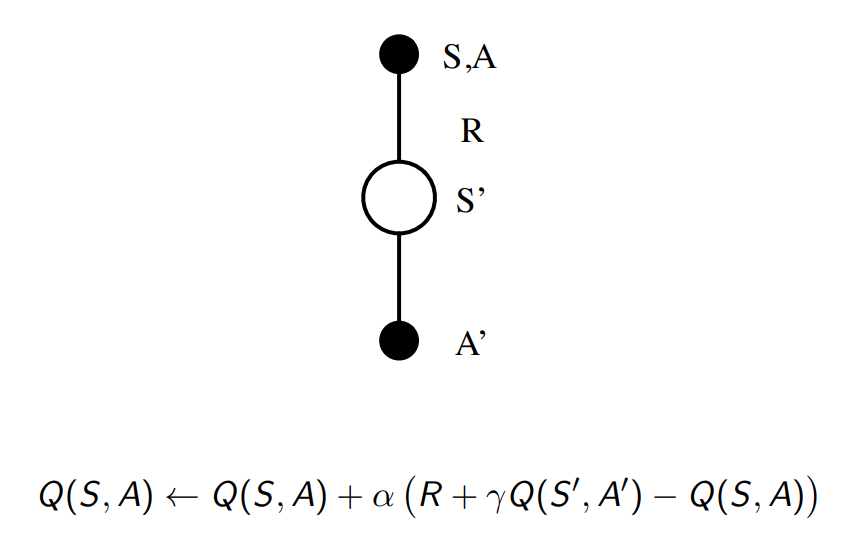

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=True)
env.render()


SFFF
FHFH
FFFH
HFFG


In [10]:
Q = np.zeros([env.nS, env.nA])
alpha = 0.1
gamma = 0.99
epsilon = 0.1

for i in range(1, 100001):
    state = env.reset()
    done = False
    
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
        
    while not done:
        next_state, reward, done, info = env.step(action)
        
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q[next_state])
        
        if done:
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * reward
        else:
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action]) # SARSA
        
        state = next_state
        action = next_action
        
    if i % 100 == 0:
        clear_output(wait=True)
        print('Episode: {}'.format(i))
        
print('Q function')
print(Q)

Episode: 100000
Q function
[[0.26260611 0.24494886 0.2543854  0.23661508]
 [0.14969989 0.1596749  0.18722079 0.22770578]
 [0.18417667 0.18533883 0.18594955 0.19504416]
 [0.13506895 0.11408552 0.08117527 0.18762778]
 [0.30883772 0.18866527 0.20350849 0.15637256]
 [0.         0.         0.         0.        ]
 [0.17854457 0.09638272 0.14439467 0.02991291]
 [0.         0.         0.         0.        ]
 [0.21465568 0.26864337 0.18745129 0.35476119]
 [0.26418997 0.48664416 0.28824283 0.22573829]
 [0.44039775 0.32285448 0.33542523 0.18177805]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.34000421 0.45121353 0.57407393 0.43366844]
 [0.6042097  0.79390507 0.67913911 0.65356943]
 [0.         0.         0.         0.        ]]


In [11]:
dic = {0:'Left', 1:'Down', 2:'Right', 3:'Up'}
for i in range(4):
    for j in range(4):
        print(dic[np.argmax(Q[i*4 + j])], end="\t")
    print()

Left	Up	Up	Up	
Left	Left	Left	Left	
Up	Down	Left	Left	
Left	Right	Down	Left	


In [12]:
state = env.reset()
done = False
env.render()

while not done:
    action = np.argmax(Q[state])
    state, reward, done, info = env.step(action)
    env.render()


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


## Q-Learning

Simulation, 즉 sampling 과정에서 Agent는 exploration과 exploitation사이에서 고민해야 한다. 따라서 여기선 입실론 그리디를 사용한다.  

하지만 Agent의 목표는 Greedy Policy가 되어야 한다. 그동안 구해놓은 Q function을 최대한 활용해야 최적의 선택을 내릴 수 있기 때문이다.  

즉, update할 t 시점의 action을 $\varepsilon$-greedy를 통해 선택하고, 해당 action을 update하기 위해선 next state의 action들 중에 argmax한 action을 가져와 update한다.  

이렇게 하면 update할 Q값을 $\varepsilon$-greedy policy를 통해 선택하고, 해당 action을 update하기 위해 greedy policy 를 통해 Q값을 선택하게 되어, 두 policy를 분리하여 학습할 수 있다.

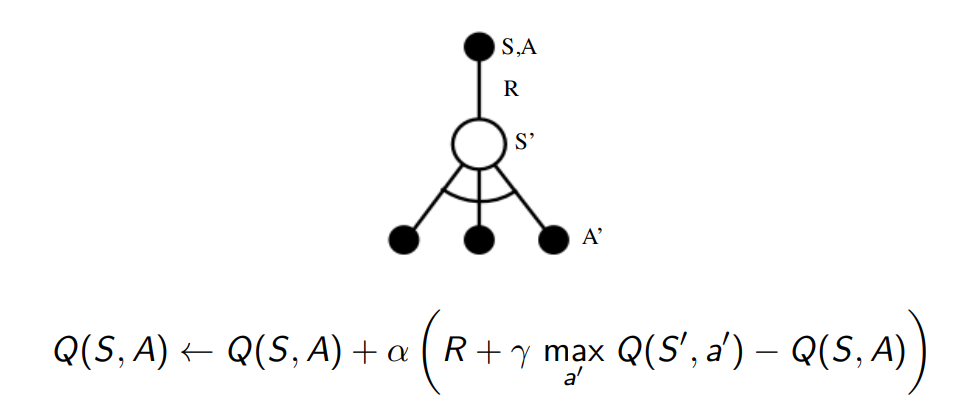

In [6]:
env = gym.make('FrozenLake-v1', is_slippery=True)
env.render()


SFFF
FHFH
FFFH
HFFG


In [7]:
Q = np.zeros([env.nS, env.nA])
alpha = 0.1
gamma = 0.99
epsilon = 0.1

for i in range(1, 100001):
    state = env.reset()
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        
        next_state, reward, done, info = env.step(action)
        
        if done:
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * reward
        else:
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state])) # Q-learning
        
        state = next_state
        
    if i % 100 == 0:
        clear_output(wait=True)
        print('Episode: {}'.format(i))
        
print('Q function')
print(Q)

Episode: 100000
Q function
[[0.6017734  0.53165547 0.54492431 0.52997627]
 [0.26346164 0.21185392 0.27272474 0.5060863 ]
 [0.36397113 0.39971974 0.38200507 0.44239921]
 [0.30229425 0.28615977 0.30436636 0.42947739]
 [0.62288959 0.3111455  0.33394229 0.35055972]
 [0.         0.         0.         0.        ]
 [0.47671444 0.1425748  0.23539872 0.1646763 ]
 [0.         0.         0.         0.        ]
 [0.36357353 0.38960229 0.42820631 0.68804471]
 [0.46068349 0.72295062 0.35878658 0.43334272]
 [0.71642237 0.53582882 0.44655791 0.34295921]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.41262428 0.57652819 0.79317279 0.38272836]
 [0.76838933 0.89114921 0.81152204 0.82410398]
 [0.         0.         0.         0.        ]]


In [8]:
dic = {0:'Left', 1:'Down', 2:'Right', 3:'Up'}
for i in range(4):
    for j in range(4):
        print(dic[np.argmax(Q[i*4 + j])], end="\t")
    print()

Left	Up	Up	Up	
Left	Left	Left	Left	
Up	Down	Left	Left	
Left	Right	Down	Left	


In [9]:
state = env.reset()
done = False
env.render()

while not done:
    action = np.argmax(Q[state])
    state, reward, done, info = env.step(action)
    env.render()


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
